# Lab Assignment Six: Wide and Deep Networks



__*Austin Chen, Luke Hansen, Oscar Vallner*__

## 1. Preparation and Overview


### 1.1 Business Understanding

For the 6th Lab Assignment, we will be using the "Diabetes 130-US hospitals of years 1999-2008" dataset, downloaded from the UCI Machine Learning Repository. This dataset has been prepared for usage in analyzing medical factors related to hospital readmission for patients with diabetes. The dataset represents ten years worth of clinical care data from 130 hospitals in the United States, as well as integrated delivery networks. In order for an entry to qualify for the dataset, it must satisfy the following requirements:

1. It must be a hospital admission
2. The admission must be diabetic related
3. The length of the stay must be more than 1 day but less than 2 weeks.
4. Laboratory tests must have been performed on the patient
5. Medications must have been administered or prescribed.

The dataset's features comprise of a mix of nominal and numeric datatypes. The features span a multitude of patient information categories such as race, gender, age, weight, and time spent in hospital. Some of the more specific features include information such as medications administered (miglitol, metformin, tolazamide, etc) and number of lab procedures. 

The features and content of this dataset can provide extremely important information for the healthcare industry, for various reasons. First and foremost, a classification model that can accurately predict whether a diabetic inpatient will return to the hospital has several implications in itself. On the medical side, knowing that a patient is at risk for rehospitalization, given a patient's specific attributes, can help doctors and physicians modify their treatment methodology to minimize the chance of rehospitalization. A similar concept applies for the patients themselves; patients who can know they may be at risk for rehospitalization can take extra precautions once they are discharged in an attempt to prevent further emergencies. And finally, if hospital administrators know that a certain number of patients will be readmitted, they could use this information in order to better plan room reservations, medical supply projections, and further logistical planning. Though it is difficult to plan resources for hospitals due to their hectic nature, having the information is still there nonetheless, and provides more options. In any case, the business applications are wide and deep no matter the stakeholder.

With the aforementioned data, we plan to construct a classifier that will predict whether or not a patient will be rehospitalized within 30 days after discharge.

However, we must highlight an important issue with our classification task. The original dataset creates three distinct class boundaries for hospital readmittance:

1. NO: No record of readmission
2. &lt;30: If the patient was readmitted in less than 30 days.
3. &gt;30: If the patient was readmitted in more than 30 days.

For the sake of our business case, we believe it would be far more feasible to narrow the scope to a binary classification. Instead of the three distinct classes seen above, a simplification could prove more pratical and informative:

1. NO: No record of readmission
2. &lt;30: If the patient was readmitted in less than 30 days.

We have decided to eliminate the third type above (>30 days) for a number of reasons. First, it is important to reiterate that one of our primary business cases is to help medical professionals improve their treatment methodologies on diabetic hospital patients. Once a patient has been released for more than 30 days, the more difficult it becomes to blame any rehospitalizations on the aspects of the procedure itself. Pinpointing reasons for rehopsitalization becomes far more nebulous once a significant amount of time has passed since original hospitalization. There could be several extenuating external circumstances that contribute to a rehospitalization of a patient independent of the hospital's treatment. Furthermore, limiting the scope to a binary classification can greatly enhance our ability to choose the most appropriate evaluation method. For an industry as important as healthcare, especially where human life is at risk, we believe that a simpler classification, with better evaluation practices and better performance, is more deployable than a multi-class problem with lower performance. Because the mere concept of emergency hospitalization bears the risk of human mortality, we would want to achieve an accuracy of at least 95+%. **However, as we will discuss later, pure accuracy will not be our primary evaluation metric.**

With more time, we can continue to refine our classification model to accomodate more classes. With regards to our specific dataset, we would require consultation with a domain expert in order to evaluate the extenuating circumstances that contribute to rehospitalization past 30 days. 

---

Link to dataset: http://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#

---

### 1.2 Class Variables

### Features

Here is a full guide to the features found in our dataset. A more comprehensive feature guide can be found here: https://www.hindawi.com/journals/bmri/2014/781670/tab1/



| No. Feature     | Feature Name  | Feature Type    | Description     |
| :-------------: |:-------------:| :-------------: | :-------------: |
| ~~1~~ | ~~encounter_id~~ | ~~Numeric~~ | *Removed from dataset for model* |
| ~~2~~ | ~~patient_nbr~~ | ~~Numeric~~ | *Removed from dataset for model* |
| 3 | race | Nominal | Race: Caucasian, Asian, Hispanic, etc. | 
| 4 | gender | Nominal| Gender: male, female, unknown/invalid |
| 5 | age | Nominal | Age ranges in 10-year intervals: [0, 10), [10, 20) |
| ~~6~~ | ~~weight~~ | ~~Numeric~~ | *Removed from dataset for model* |
| 7 | admission_type_id | Nominal | Integer ientifier. Ex. Emergency, elective, etc. |
| 8 | discharge_disposition_id | Nominal | Integer identifier. Ex. Discharged to home, expired, etc. |
| 9 | admission_source_id | Nominal | Integer identifier |
| 10 | time_in_hospital | Numeric | Integer number of days spent in hospital |
| ~~11~~ | ~~payer_code~~ | ~~Nominal~~ | *Removed from dataset for model* |
| ~~12~~ | ~~medical_specialty~~ | ~~Nominal~~ | *Removed from dataset for model* |
| 13 | num_lab_procedures | Numeric | Number of lab tests performed during admission |
| 14 | num_procedures | Numeric | Number of other procedures performed during admission |
| 15 | num_medications | Numeric | Number of distinct medications administered during encounter |
| 16 | num_outpatient | Number | Number of outpatient visits of the patient in the year preceding the encounter |
| 17 | number_emergency | Number | Number of emergency visits of the patient in the year preceding the encounter |
| 18 | number_inpatient | Number | Number of impatient visits of the patient in the year preceding the encounter |
| 19 | diag_1 | Nominal | Primary diagnosis |
| 20 | diag_2 | Nominal | Secondary diagnosis |
| 21 | diag_3 | Nominal| Any additional secondary diagnosis |
| 22 | number_diagnoses | Numeric | Number of diagnoses |
| 23 | max_glu_serum | Nominal |  Result for glucose serum test. Represented by a range of values. |
| 24 | A1Cresult | Nominal | Result for A1c test. Represented by a arange of values. |
| 25-48 | Medications | Nominal | 24 features for different medications |
| 49 | change | Nominal | Whether there was a change in diabetic medications. |
| 50 | diabetesMed | Nominal | Indicates whether any diabetic medication was prescribed. |
| 51 | Readmitted | Nominal | Whether patient was readmitted. "No" or "less than 30 days". |

Though we removed some features such as encounter_id and patient_nbr because they don't contribute any relevant information to our classification dataset, we also decided to remove a few other features that actually have conceptual significance to the dataset. For example, the weight attribute has many potential ties to qualifying overall health. However, 97% of the weight data was missing, and imputing 97% of the data for a category is not possible.

### 1.3 Data Preparation

We begin our data preparation by reading in our dataset.

In [4]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
df = pd.read_csv('data/diabetic_data.csv', encoding = 'latin1',low_memory=False)

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


First, the most important aspect of our data preparation is to narrow down our classification problem to binary classification, as we discussed above. We will be dropping all entries in which patients were readmitted over 30 days past their initial discharge. We will be changing all instances of "NO" (no readmittance) to 0 and all instances of "&lt;30" to 1.

In [5]:
df.readmitted[df.readmitted == 'NO' ] = 0
df.readmitted[df.readmitted == '<30' ] = 1
df = df.drop(df[df.readmitted == '>30'].index)

Next, we will drop all features that are unnecessary for our classification model. Furthermore, we will be dropping entries in which there is unimputable data.

In [6]:
df.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)
df.dropna(axis=1, how='all')
y = df['readmitted']
X = df.drop('readmitted', axis=1)
X = pd.get_dummies(X)

### 1.4 Cross-product Features

After looking at all the useful features in our dataset, we need to find features that can be combined into cross-product features for the purpose of memorization techniques in wide networks. Unfortunately, most of the medications and illnesses in the dataset require extreme domain knowledge, outside our realm of expertise as computer science undergraduates. Despite our lack of knowledge in the medical domain, we are still left with a few options that we can logically group together with common intuition in order to discover and create new features. These include:

- [race, gender]: Race and gender may not be the deciding factor in our model's predictions. However, these two factors are intuitive and could potentially have correlations to different classification outcomes. Furthermore, race and gender cross-products make conceptual sense because certain race-gender combinations can sometimes have varying correlations to diabetic status. This could potentially be due to genetics and socioeconomic factors.

- [age, diag_1]: Age and the patient's primary diagnosis are two other features that seem like they could be logiically grouped together. Crossing age with diagnosis may give more importance to a patient's age when determining how resilient they are to a certain illness and how that impacts their potential readmittance to the hospital. It is clear that in most circumstances, patients with a more advanced age might not react as well as a young adult, given the same illness.

- [gender, diag_1]: Similar to the reasoning to age and primary diagnosis, it might be useful explore a gender-diagnosis cross-product feature. There may be primary diagnoses that vary by each gender.

Though we have labelled instances of Cross-product features we would like to experiment, we thought it might also be worthwhile to mention a cross-product feature type that we would not want to experiment with. In particular, we do not think it would be wise to create cross-product features of the 24 different medications. Though it may be tempting to want to see how different combinations medications might correlate with one another, we simply do not have the domain expertise to authoritatively determine whether two medications may be mixed with each other. If we haphazardly generate cross-product features of two incompatible drugs, it would deviate from a realistic model.



### 1.5 Evaluation Metrics

In determining the most important evaluation metric, it is important to reiterate the business case with our classification model. As we stated before, our binary classification problem aims to let doctors and patients know whether the patient is at risk for a hospital readmission within 30 days of discharge. Given that information, we strongly believe that it is of the utmost importance to reduce the number of false-negatives. In the context of our classification problem, a false-negative is would entail classifying a patient as a "NO" admittance, when they in truth, are at risk for return. Telling a patient that they have nothing to worry about, only to be hospitalized later, can be damaging to all stakeholders at hand. The patient might be dissapointed because they could have taken more precautionary measures despite not being told to, and the doctor's credibility would be damaged. It would be better to overprepare a discharged patient for the worst-case scenario by giving them a false-positive diagnosis.

Given the contextual analysis above of our business case, we believe that the most appropriate evaluation metric for our model would be a Recall scoring model. We have decided to use Recall as our scoring metric because it is equally important whether or not the model's predictions are true-positive or true-negative, but also necessary to penalize the model for giving false-negatives that could underprepare the patient for planning their future health once they are discharged.


### 1.6 Cross Validation Methods

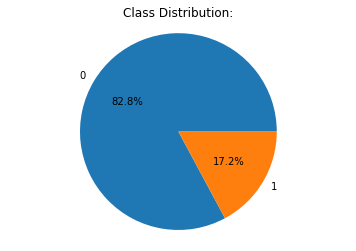

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

uniq, label = np.unique(y, return_inverse=True)

plt.pie(np.bincount(label), labels=uniq, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Class Distribution:')
plt.show()

By looking at our class distribution visualization above, we can tell that we have a large class imbalance. 82.8% of our entries consist of patients who were not readmitted, while 17.2% of our dataset was readmitted. Because we have two unbalanced classes, it is statistically necessary to use a Stratified Split to ensure that each fold has an equal representation of the under-represented class. Because we only have around ~40,000 instances in our training set, compared to the tens of millions of diabetic patients in the United States, it makes sense to perform our cross-validation using a k-folding method. Due to the size limitation of our dataset when compared to the population numbers, we need to maximize the number of instances in each iteration of k-fold. A k = 10 fold cross-validation will utilize 90% of the data in each iteration. For the reasons mentioned above, we believe a 10-fold stratified cross validation will maximize the generalization performance of our trained model.


## 2. Modeling

### 2.1 Wide and Deep Network Implementation

### 2.2 Generalization Performance

### 2.3 Performance Analysis

## 3. Visualizing Embedding Weights